In [113]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import math
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [2]:
df=pd.read_csv("Data/FoodBalanceSheets_E_All_Data/FoodBalanceSheets_E_All_Data_NOFLAG.csv", encoding="latin-1")

In [3]:
df.drop(["Area Code","Item Code","Element Code"],axis=1,inplace=True)
df

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,Population,Total Population - Both sexes,1000 persons,29186.00,30117.00,31161.00,32270.00,33371.00,34414.00,35383.00,36296.00,37172.00,38042.00
1,Afghanistan,Population,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,2170.00,2152.00,2159.00,2196.00,2265.00,2250.00,2228.00,2303.00,2270.00,2273.00
3,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,59.23,58.00,57.82,57.71,60.17,58.45,58.46,59.50,57.62,57.31
4,Afghanistan,Grand Total,Fat supply quantity (g/capita/day),g/capita/day,36.69,34.81,36.53,37.10,41.48,38.28,40.70,40.03,41.46,39.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319738,Net Food Importing Developing Countries,Miscellaneous,Food,1000 tonnes,787.00,839.00,921.00,935.00,958.00,992.00,1032.00,1066.00,1140.00,1199.00
319739,Net Food Importing Developing Countries,Miscellaneous,Food supply quantity (kg/capita/yr),kg,0.62,0.65,0.68,0.67,0.67,0.68,0.69,0.70,0.73,0.75
319740,Net Food Importing Developing Countries,Miscellaneous,Food supply (kcal/capita/day),kcal/capita/day,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
319741,Net Food Importing Developing Countries,Miscellaneous,Protein supply quantity (g/capita/day),g/capita/day,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [4]:
df.dropna(axis=0, inplace=True)

In [5]:
df=df.loc[~(df.iloc[:,4:]==0).all(axis=1)]

In [6]:
df.Area.value_counts()[:30]

World                                      1738
Asia                                       1659
Net Food Importing Developing Countries    1604
Americas                                   1590
Africa                                     1551
Europe                                     1531
European Union (27)                        1506
Western Asia                               1503
Low Income Food Deficit Countries          1498
Least Developed Countries                  1470
Land Locked Developing Countries           1462
Eastern Asia                               1460
South America                              1424
South-eastern Asia                         1414
Southern Europe                            1407
Central America                            1400
China                                      1395
Southern Asia                              1374
Eastern Africa                             1366
Oceania                                    1366
Small Island Developing States          

In [7]:
df.Item.value_counts()[:30]

Milk - Excluding Butter       5280
Eggs                          4586
Miscellaneous                 3556
Cereals - Excluding Beer      3243
Oilcrops                      3075
Starchy Roots                 2964
Wheat and products            2802
Fruits - Excluding Wine       2801
Maize and products            2796
Potatoes and products         2686
Rice and products             2685
Vegetables                    2648
Pulses                        2611
Vegetables, other             2596
Vegetable Oils                2582
Fruits, other                 2543
Animal fats                   2419
Meat                          2412
Fish, Seafood                 2407
Sugar & Sweeteners            2300
Pulses, Other and products    2281
Oilcrops Oil, Other           2233
Stimulants                    2226
Fats, Animals, Raw            2210
Poultry Meat                  2193
Alcoholic Beverages           2184
Barley and products           2182
Pelagic Fish                  2170
Oranges, Mandarines 

In [8]:
df.Element.unique()

array(['Total Population - Both sexes', 'Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Production',
       'Import Quantity', 'Stock Variation', 'Export Quantity',
       'Domestic supply quantity', 'Feed', 'Seed', 'Losses', 'Residuals',
       'Food', 'Food supply quantity (kg/capita/yr)', 'Processing',
       'Other uses (non-food)', 'Tourist consumption'], dtype=object)

In [9]:
def select(area,item ):
    data=df[df.Area==area]
    data=data[data['Item'].str.contains(item)]
    return data

In [10]:
data=select("China","Cereals - Ex")

In [11]:
data

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
44939,China,Cereals - Excluding Beer,Production,1000 tonnes,498113.00,521383.00,541368.00,554623.00,559483.00,620074.00,616491.00,616130.00,611244.00,614914.00
44940,China,Cereals - Excluding Beer,Import Quantity,1000 tonnes,13861.00,13044.00,22636.00,22952.00,28186.00,41880.00,31380.00,35473.00,29491.00,27492.00
44941,China,Cereals - Excluding Beer,Stock Variation,1000 tonnes,8114.00,16754.00,34353.00,64549.00,75918.00,80210.00,44705.00,35028.00,7514.00,6019.00
44942,China,Cereals - Excluding Beer,Export Quantity,1000 tonnes,3127.00,2793.00,2456.00,2414.00,2029.00,1770.00,2323.00,3686.00,5683.00,7154.00
44943,China,Cereals - Excluding Beer,Domestic supply quantity,1000 tonnes,500734.00,514880.00,527195.00,510613.00,509722.00,579975.00,600843.00,612889.00,627539.00,629233.00
44944,China,Cereals - Excluding Beer,Feed,1000 tonnes,151931.00,158640.00,164114.00,151419.00,146148.00,188554.00,211366.00,219363.00,231253.00,232039.00
44945,China,Cereals - Excluding Beer,Seed,1000 tonnes,13242.00,13073.00,13167.00,12518.00,13292.00,13672.00,13576.00,13449.00,13225.00,12829.00
44946,China,Cereals - Excluding Beer,Losses,1000 tonnes,19013.00,19976.00,21105.00,21453.00,21926.00,24945.00,24365.00,24293.00,24021.00,23997.00
44947,China,Cereals - Excluding Beer,Processing,1000 tonnes,11574.00,12760.00,12688.00,13384.00,16191.00,15775.00,14741.00,14499.00,12829.00,12608.00
44948,China,Cereals - Excluding Beer,Other uses (non-food),1000 tonnes,28599.00,29694.00,32682.00,30592.00,28518.00,48065.00,49183.00,50367.00,52781.00,52100.00


# MEAN-BASED PREDICTION

Calculate the loss value of an upcoming year based on the average of previous losses

In [12]:
def mean_based(year):
    try:
        mean_pred=[]
        losses=data[data.Element=="Losses"].iloc[0,4:]
        count=0
        sum=0
        for i in losses.index:
            if i=="Y"+str(year):
                break
            sum=losses[i]+sum
            count+=1
        mean_pred=sum/count
        return mean_pred
    except:
        return losses["Y"+str(year)]

In [14]:
mean_based_pred=[]
losses=pd.DataFrame(data[data.Element=="Losses"].iloc[0,4:])
losses.columns=["Actual"]
losses["MeanBasedPred"]=np.zeros([len(losses)])
for i in losses.index:
    losses["MeanBasedPred"][i]=mean_based(int(i[1:]))

/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_25222/3604102451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses["MeanBasedPred"][i]=mean_based(int(i[1:]))


In [15]:
losses.reset_index()

,index,Actual,MeanBasedPred
0,Y2010,19013.0,19013.000000
1,Y2011,19976.0,19013.000000
2,Y2012,21105.0,19494.500000
3,Y2013,21453.0,20031.333333
4,Y2014,21926.0,20386.750000
5,Y2015,24945.0,20694.600000
6,Y2016,24365.0,21403.000000
7,Y2017,24293.0,21826.142857
8,Y2018,24021.0,22134.500000
9,Y2019,23997.0,22344.111111


In [17]:
MSE = np.square(np.subtract(losses["Actual"].values,losses["MeanBasedPred"].values)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2170.879042597463


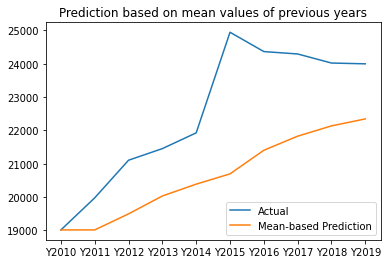

In [21]:
plt.plot(losses.index,losses["Actual"])
plt.plot(losses.index,losses.MeanBasedPred)
plt.title("Prediction based on mean values of previous years")
plt.legend(['Actual', 'Mean-based Prediction'], loc='lower right')

In [22]:
population=df[df["Element"]=="Total Population - Both sexes"]
population=population[population.Area=="China"].iloc[0,4:]*1000
population

Y2010    1399503000.0
Y2011    1407325000.0
Y2012    1415164000.0
Y2013    1422971000.0
Y2014    1430671000.0
Y2015    1438193000.0
Y2016    1445524000.0
Y2017    1452626000.0
Y2018    1459378000.0
Y2019    1465634000.0
Name: 44928, dtype: object

In [23]:
lstm_data=pd.DataFrame(population)
lstm_data.columns=["Population"]

In [24]:
lstm_data["Actual Loss"]=losses["Actual"]

# ARIMA MODEL

predicted=25240.417369, expected=24365.000000
predicted=24320.932937, expected=24293.000000
predicted=24287.198562, expected=24021.000000
predicted=23997.888237, expected=23997.000000
Test RMSE: 457.711


/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


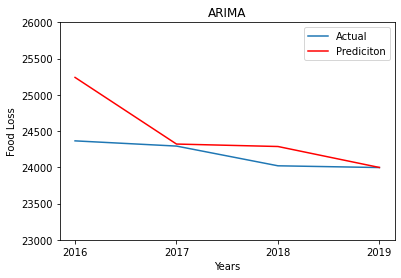

In [30]:
series=lstm_data["Actual Loss"]
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
years=['2016','2017','2018','2019']
pyplot.plot(years,test)
pyplot.plot(predictions, color='red')
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.legend(["Actual","Prediciton"])
plt.title("ARIMA")
plt.ylim(23000,26000)
pyplot.show()

In [31]:
predictions

[25240.417368872564, 24320.93293662449, 24287.198561513767, 23997.888236644696]

In [33]:
def df_to_X_y(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [102]:
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(lstm_data["Actual Loss"], WINDOW_SIZE)
X1.shape, y1.shape

((7, 3, 1), (7,))

In [103]:
X_train1, y_train1 = X1[:4], y1[:4]
X_val1, y_val1 = X1[4:6], y1[4:6]
X_test1, y_test1 = X1[6:], y1[6:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((4, 3, 1), (4,), (2, 3, 1), (2,), (1, 3, 1), (1,))

Data Scaling

In [104]:
scalers = {}
for i in range(X_train1.shape[1]):
    scalers[i] = StandardScaler()
    X_train1[:, i, :] = scalers[i].fit_transform(X_train1[:, i, :]) 

for i in range(X_test1.shape[1]):
    X_test1[:, i, :] = scalers[i].transform(X_test1[:, i, :]) 

# LSTM MODEL

In [67]:
model1 = Sequential()
model1.add(InputLayer((3, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

# model1.summary()

cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 539233280.0000 - root_mean_squared_error: 23221.3965

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 5s 5s/step - loss: 539233280.0000 - root_mean_squared_error: 23221.3965 - val_loss: 368912032.0000 - val_root_mean_squared_error: 19207.0820
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 334304448.0000 - root_mean_squared_error: 18283.9941

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 334304448.0000 - root_mean_squared_error: 18283.9941 - val_loss: 82948400.0000 - val_root_mean_squared_error: 9107.6016
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 68232768.0000 - root_mean_squared_error: 8260.3125

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 68232768.0000 - root_mean_squared_error: 8260.3125 - val_loss: 77536200.0000 - val_root_mean_squared_error: 8805.4639
Epoch 4/20
1/1 [==============================] - 0s 22ms/step - loss: 98096296.0000 - root_mean_squared_error: 9904.3574 - val_loss: 98238832.0000 - val_root_mean_squared_error: 9911.5508
Epoch 5/20
1/1 [==============================] - ETA: 0s - loss: 120977584.0000 - root_mean_squared_error: 10998.9814

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 120977584.0000 - root_mean_squared_error: 10998.9814 - val_loss: 5064732.0000 - val_root_mean_squared_error: 2250.4958
Epoch 6/20
1/1 [==============================] - 0s 23ms/step - loss: 12708782.0000 - root_mean_squared_error: 3564.9380 - val_loss: 26743740.0000 - val_root_mean_squared_error: 5171.4351
Epoch 7/20
1/1 [==============================] - 0s 23ms/step - loss: 19781922.0000 - root_mean_squared_error: 4447.6875 - val_loss: 82448880.0000 - val_root_mean_squared_error: 9080.1367
Epoch 8/20
1/1 [==============================] - 0s 23ms/step - loss: 67787360.0000 - root_mean_squared_error: 8233.3076 - val_loss: 94378352.0000 - val_root_mean_squared_error: 9714.8525
Epoch 9/20
1/1 [==============================] - 0s 23ms/step - loss: 78466632.0000 - root_mean_squared_error: 8858.1396 - val_loss: 60720688.0000 - val_root_mean_squared_error: 7792.3481
Epoch 10/20
1/1 [==============================] - 0s 23ms/step - l

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 10309953.0000 - root_mean_squared_error: 3210.9116 - val_loss: 1535935.0000 - val_root_mean_squared_error: 1239.3285
Epoch 12/20
1/1 [==============================] - 0s 22ms/step - loss: 7181851.5000 - root_mean_squared_error: 2679.8977 - val_loss: 26336720.0000 - val_root_mean_squared_error: 5131.9316
Epoch 13/20
1/1 [==============================] - 0s 22ms/step - loss: 39660308.0000 - root_mean_squared_error: 6297.6431 - val_loss: 30555044.0000 - val_root_mean_squared_error: 5527.6616
Epoch 14/20
1/1 [==============================] - 0s 23ms/step - loss: 44658276.0000 - root_mean_squared_error: 6682.6846 - val_loss: 7378102.0000 - val_root_mean_squared_error: 2716.2661
Epoch 15/20
1/1 [==============================] - 0s 22ms/step - loss: 15940850.0000 - root_mean_squared_error: 3992.5994 - val_loss: 1539218.5000 - val_root_mean_squared_error: 1240.6525
Epoch 16/20
1/1 [==============================] - 0s 22ms/step - lo

In [68]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [69]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1/1 [==============================] - 0s 365ms/step


,Train Predictions,Actuals
0,25388.84375,21453.0
1,25388.84375,21926.0
2,25388.84375,24945.0
3,25388.84375,24365.0


In [70]:
mean_absolute_error(y_train1,train_predictions)

2216.59375

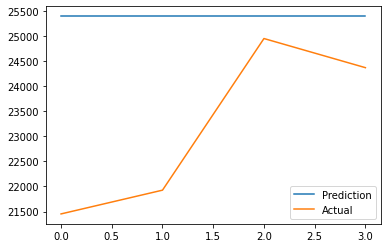

In [71]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])
plt.legend(['Prediction', 'Actual'], loc='lower right')

In [72]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1/1 [==============================] - 0s 15ms/step


,Val Predictions,Actuals
0,25388.84375,24293.0
1,25388.84375,24021.0


In [73]:
# plt.plot(val_results['Val Predictions'])
# plt.plot(val_results['Actuals'])

In [74]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

1/1 [==============================] - 0s 15ms/step


,Test Predictions,Actuals
0,25388.84375,23997.0


dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


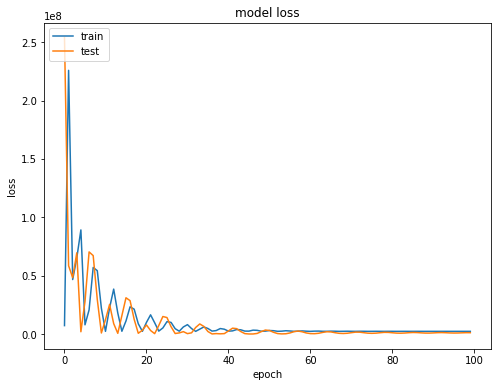

In [75]:
history = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, verbose=0)  #..., callbacks=[cp1], verbose=0)
print(history.history.keys())

figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# GRU MODEL

In [142]:
model3 = Sequential()
model3.add(InputLayer((3, 1)))
model3.add(GRU(64))
model3.add(Dense(50, 'relu'))
model3.add(Dense(50, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanAbsolutePercentageError(), optimizer=Adam(learning_rate=0.1), metrics=[RootMeanSquaredError()])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 64)                12864     
                                                                 
 dense_52 (Dense)            (None, 50)                3250      
                                                                 
 dense_53 (Dense)            (None, 50)                2550      
                                                                 
 dense_54 (Dense)            (None, 1)                 51        
                                                                 
Total params: 18,715
Trainable params: 18,715
Non-trainable params: 0
_________________________________________________________________


In [143]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=200, callbacks=[cp3])

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 99.9999 - root_mean_squared_error: 23221.1289

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 4s 4s/step - loss: 99.9999 - root_mean_squared_error: 23221.1289 - val_loss: 99.9558 - val_root_mean_squared_error: 24146.7051
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 99.9742 - root_mean_squared_error: 23215.5195

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 99.9742 - root_mean_squared_error: 23215.5195 - val_loss: 99.7888 - val_root_mean_squared_error: 24106.3574
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 99.5438 - root_mean_squared_error: 23121.8105

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 99.5438 - root_mean_squared_error: 23121.8105 - val_loss: 99.5073 - val_root_mean_squared_error: 24038.3770
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 97.9818 - root_mean_squared_error: 22763.1895

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 3s 3s/step - loss: 97.9818 - root_mean_squared_error: 22763.1895 - val_loss: 98.6945 - val_root_mean_squared_error: 23842.0273
Epoch 5/200
1/1 [==============================] - ETA: 0s - loss: 94.5706 - root_mean_squared_error: 21968.9336

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 3s 3s/step - loss: 94.5706 - root_mean_squared_error: 21968.9336 - val_loss: 97.8053 - val_root_mean_squared_error: 23627.2324
Epoch 6/200
1/1 [==============================] - ETA: 0s - loss: 89.0448 - root_mean_squared_error: 20695.6973

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 89.0448 - root_mean_squared_error: 20695.6973 - val_loss: 96.4821 - val_root_mean_squared_error: 23307.6094
Epoch 7/200
1/1 [==============================] - ETA: 0s - loss: 79.9681 - root_mean_squared_error: 18603.9570

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 4s 4s/step - loss: 79.9681 - root_mean_squared_error: 18603.9570 - val_loss: 94.1415 - val_root_mean_squared_error: 22742.2051
Epoch 8/200
1/1 [==============================] - ETA: 0s - loss: 66.4048 - root_mean_squared_error: 15482.5479

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 66.4048 - root_mean_squared_error: 15482.5479 - val_loss: 92.3714 - val_root_mean_squared_error: 22314.6230
Epoch 9/200
1/1 [==============================] - ETA: 0s - loss: 47.0056 - root_mean_squared_error: 11034.0889

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 47.0056 - root_mean_squared_error: 11034.0889 - val_loss: 86.4030 - val_root_mean_squared_error: 20872.9121
Epoch 10/200
1/1 [==============================] - ETA: 0s - loss: 20.6026 - root_mean_squared_error: 5070.9995

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 20.6026 - root_mean_squared_error: 5070.9995 - val_loss: 85.2405 - val_root_mean_squared_error: 20592.1250
Epoch 11/200
1/1 [==============================] - ETA: 0s - loss: 13.9811 - root_mean_squared_error: 3461.2439

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 13.9811 - root_mean_squared_error: 3461.2439 - val_loss: 82.2556 - val_root_mean_squared_error: 19871.0977
Epoch 12/200
1/1 [==============================] - ETA: 0s - loss: 24.5392 - root_mean_squared_error: 5765.5430

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 24.5392 - root_mean_squared_error: 5765.5430 - val_loss: 74.0128 - val_root_mean_squared_error: 17879.9980
Epoch 13/200
1/1 [==============================] - ETA: 0s - loss: 21.4354 - root_mean_squared_error: 5069.0728

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 21.4354 - root_mean_squared_error: 5069.0728 - val_loss: 58.1691 - val_root_mean_squared_error: 14052.8926
Epoch 14/200
1/1 [==============================] - ETA: 0s - loss: 9.2367 - root_mean_squared_error: 2516.6292

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 9.2367 - root_mean_squared_error: 2516.6292 - val_loss: 58.0225 - val_root_mean_squared_error: 14017.4707
Epoch 15/200
1/1 [==============================] - 0s 23ms/step - loss: 7.8069 - root_mean_squared_error: 2412.6045 - val_loss: 60.2808 - val_root_mean_squared_error: 14562.9834
Epoch 16/200
1/1 [==============================] - 0s 24ms/step - loss: 14.9666 - root_mean_squared_error: 3851.4634 - val_loss: 61.3455 - val_root_mean_squared_error: 14820.1562
Epoch 17/200
1/1 [==============================] - 0s 24ms/step - loss: 15.5722 - root_mean_squared_error: 3980.9653 - val_loss: 59.1364 - val_root_mean_squared_error: 14286.5498
Epoch 18/200
1/1 [==============================] - ETA: 0s - loss: 10.8855 - root_mean_squared_error: 3005.3032

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 4s 4s/step - loss: 10.8855 - root_mean_squared_error: 3005.3032 - val_loss: 52.6192 - val_root_mean_squared_error: 12712.2998
Epoch 19/200
1/1 [==============================] - ETA: 0s - loss: 6.2515 - root_mean_squared_error: 1529.6351

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 6.2515 - root_mean_squared_error: 1529.6351 - val_loss: 44.9201 - val_root_mean_squared_error: 10852.6143
Epoch 20/200
1/1 [==============================] - ETA: 0s - loss: 7.9940 - root_mean_squared_error: 2288.3408

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 7.9940 - root_mean_squared_error: 2288.3408 - val_loss: 37.3969 - val_root_mean_squared_error: 9035.4668
Epoch 21/200
1/1 [==============================] - ETA: 0s - loss: 12.7016 - root_mean_squared_error: 3196.8445

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 12.7016 - root_mean_squared_error: 3196.8445 - val_loss: 32.5596 - val_root_mean_squared_error: 7867.1191
Epoch 22/200
1/1 [==============================] - 0s 23ms/step - loss: 9.8902 - root_mean_squared_error: 2637.9529 - val_loss: 37.7512 - val_root_mean_squared_error: 9121.0439
Epoch 23/200
1/1 [==============================] - 0s 22ms/step - loss: 6.3543 - root_mean_squared_error: 1489.9854 - val_loss: 39.5412 - val_root_mean_squared_error: 9553.3975
Epoch 24/200
1/1 [==============================] - 0s 25ms/step - loss: 6.7499 - root_mean_squared_error: 2193.3899 - val_loss: 34.4164 - val_root_mean_squared_error: 8315.5957
Epoch 25/200
1/1 [==============================] - ETA: 0s - loss: 10.9556 - root_mean_squared_error: 3010.8760

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 10.9556 - root_mean_squared_error: 3010.8760 - val_loss: 29.9378 - val_root_mean_squared_error: 7233.8818
Epoch 26/200
1/1 [==============================] - ETA: 0s - loss: 9.8579 - root_mean_squared_error: 2790.4126

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 9.8579 - root_mean_squared_error: 2790.4126 - val_loss: 25.5174 - val_root_mean_squared_error: 6166.3164
Epoch 27/200
1/1 [==============================] - ETA: 0s - loss: 5.9681 - root_mean_squared_error: 1772.1688

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 5.9681 - root_mean_squared_error: 1772.1688 - val_loss: 23.2107 - val_root_mean_squared_error: 5609.2524
Epoch 28/200
1/1 [==============================] - ETA: 0s - loss: 6.2648 - root_mean_squared_error: 1473.3608

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 4s 4s/step - loss: 6.2648 - root_mean_squared_error: 1473.3608 - val_loss: 19.8070 - val_root_mean_squared_error: 4787.3208
Epoch 29/200
1/1 [==============================] - ETA: 0s - loss: 6.8786 - root_mean_squared_error: 1940.9215

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 3s 3s/step - loss: 6.8786 - root_mean_squared_error: 1940.9215 - val_loss: 18.1469 - val_root_mean_squared_error: 4386.4780
Epoch 30/200
1/1 [==============================] - 0s 23ms/step - loss: 7.3570 - root_mean_squared_error: 2083.4197 - val_loss: 19.8803 - val_root_mean_squared_error: 4805.0146
Epoch 31/200
1/1 [==============================] - 0s 23ms/step - loss: 6.3169 - root_mean_squared_error: 1704.4786 - val_loss: 21.6761 - val_root_mean_squared_error: 5238.6680
Epoch 32/200
1/1 [==============================] - 0s 24ms/step - loss: 6.0969 - root_mean_squared_error: 1451.1733 - val_loss: 23.5203 - val_root_mean_squared_error: 5684.0059
Epoch 33/200
1/1 [==============================] - 0s 22ms/step - loss: 5.8583 - root_mean_squared_error: 1423.0500 - val_loss: 25.3991 - val_root_mean_squared_error: 6137.7412
Epoch 34/200
1/1 [==============================] - 0s 23ms/step - loss: 5.6023 - root_mean_squared_error: 1650.0005 - val_lo

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 5.5655 - root_mean_squared_error: 1552.1931 - val_loss: 15.7678 - val_root_mean_squared_error: 3812.1006
Epoch 39/200
1/1 [==============================] - 0s 22ms/step - loss: 8.5584 - root_mean_squared_error: 2248.7100 - val_loss: 17.6517 - val_root_mean_squared_error: 4266.9199
Epoch 40/200
1/1 [==============================] - 0s 23ms/step - loss: 6.1392 - root_mean_squared_error: 1712.5967 - val_loss: 21.7514 - val_root_mean_squared_error: 5256.8394
Epoch 41/200
1/1 [==============================] - 0s 23ms/step - loss: 4.7694 - root_mean_squared_error: 1145.2950 - val_loss: 25.5504 - val_root_mean_squared_error: 6174.2676
Epoch 42/200
1/1 [==============================] - 0s 23ms/step - loss: 5.5833 - root_mean_squared_error: 1749.2994 - val_loss: 24.8065 - val_root_mean_squared_error: 5994.6348
Epoch 43/200
1/1 [==============================] - 0s 23ms/step - loss: 5.0228 - root_mean_squared_error: 1587.8529 - val_lo

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 2s 2s/step - loss: 2.7482 - root_mean_squared_error: 729.7851 - val_loss: 15.4701 - val_root_mean_squared_error: 3740.2429
Epoch 53/200
1/1 [==============================] - 0s 24ms/step - loss: 3.2168 - root_mean_squared_error: 800.5683 - val_loss: 19.6638 - val_root_mean_squared_error: 4752.7549
Epoch 54/200
1/1 [==============================] - 0s 23ms/step - loss: 2.7371 - root_mean_squared_error: 724.4777 - val_loss: 18.8223 - val_root_mean_squared_error: 4549.5664
Epoch 55/200
1/1 [==============================] - ETA: 0s - loss: 1.9997 - root_mean_squared_error: 554.0657

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 3s 3s/step - loss: 1.9997 - root_mean_squared_error: 554.0657 - val_loss: 13.4672 - val_root_mean_squared_error: 3256.7686
Epoch 56/200
1/1 [==============================] - ETA: 0s - loss: 4.7018 - root_mean_squared_error: 1110.4329

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 3s 3s/step - loss: 4.7018 - root_mean_squared_error: 1110.4329 - val_loss: 13.4354 - val_root_mean_squared_error: 3249.0977
Epoch 57/200
1/1 [==============================] - 0s 22ms/step - loss: 4.4310 - root_mean_squared_error: 1052.9720 - val_loss: 18.0709 - val_root_mean_squared_error: 4368.1235
Epoch 58/200
1/1 [==============================] - 0s 23ms/step - loss: 1.9188 - root_mean_squared_error: 513.4223 - val_loss: 17.7742 - val_root_mean_squared_error: 4296.4868
Epoch 59/200
1/1 [==============================] - ETA: 0s - loss: 1.7739 - root_mean_squared_error: 485.8320

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1/1 [==============================] - 3s 3s/step - loss: 1.7739 - root_mean_squared_error: 485.8320 - val_loss: 13.1077 - val_root_mean_squared_error: 3170.0027
Epoch 60/200
1/1 [==============================] - 0s 22ms/step - loss: 4.1010 - root_mean_squared_error: 998.2823 - val_loss: 13.4767 - val_root_mean_squared_error: 3259.0596
Epoch 61/200
1/1 [==============================] - 0s 23ms/step - loss: 3.4145 - root_mean_squared_error: 855.4897 - val_loss: 25.0897 - val_root_mean_squared_error: 6063.0156
Epoch 62/200
1/1 [==============================] - 0s 24ms/step - loss: 2.9622 - root_mean_squared_error: 738.9396 - val_loss: 25.2157 - val_root_mean_squared_error: 6093.4556
Epoch 63/200
1/1 [==============================] - 0s 23ms/step - loss: 3.1561 - root_mean_squared_error: 783.8038 - val_loss: 21.4011 - val_root_mean_squared_error: 5172.2632
Epoch 64/200
1/1 [==============================] - 0s 25ms/step - loss: 2.0809 - root_mean_squared_error: 609.4705 - val_loss: 22

In [144]:
model3 = load_model('model3/')
train_predictions3 = model3.predict(X_train1).flatten()
train_results3 = pd.DataFrame(data={'Train Predictions':train_predictions3, 'Actuals':y_train1})
train_results3

1/1 [==============================] - 0s 296ms/step


,Train Predictions,Actuals
0,22456.437500,21453.0
1,22528.859375,21926.0
2,25745.533203,24945.0
3,25770.376953,24365.0


(20000.0, 28000.0)

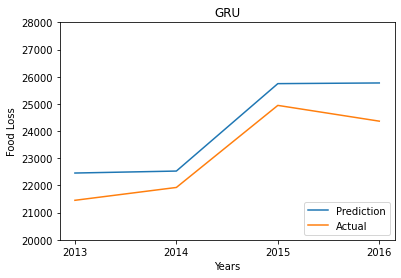

In [145]:
train_results3.index=['2013','2014','2015','2016']
plt.plot(train_results3['Train Predictions'])
plt.plot(train_results3['Actuals'])

plt.legend(['Prediction', 'Actual'], loc='lower right')
plt.ylim(20000,30000)
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.title("GRU")
plt.ylim(20000,28000)

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


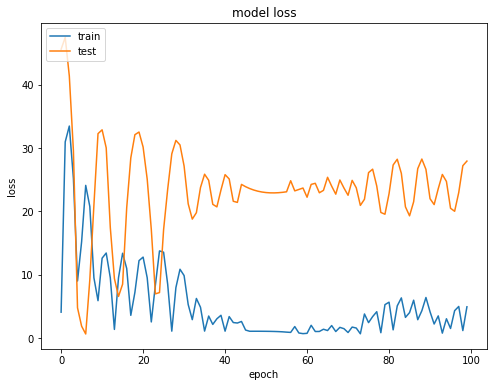

In [146]:
history = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, verbose=0)
print(history.history.keys())


figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
val_predictions3 = model3.predict(X_val1).flatten()
val_results3 = pd.DataFrame(data={'Val Predictions':val_predictions3, 'Actuals':y_val1})
val_results3

1/1 [==============================] - 0s 16ms/step


,Val Predictions,Actuals
0,17401.720703,24293.0
1,17401.720703,24021.0


In [201]:
test_predictions3=tf.convert_to_tensor(test_predictions3, dtype=tf.int64)
test_predictions3 = model3.predict(test_predictions3).flatten()
test_results3 = pd.DataFrame(data={'Test Predictions':test_predictions3, 'Actuals':y_test1})
test_results3

NameError: name 'tf' is not defined